In [99]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import sklearn.linear_model 
import seaborn as sns #для визуализации
# %matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

In [100]:
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston['DESCR'])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [101]:
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [102]:
boston_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


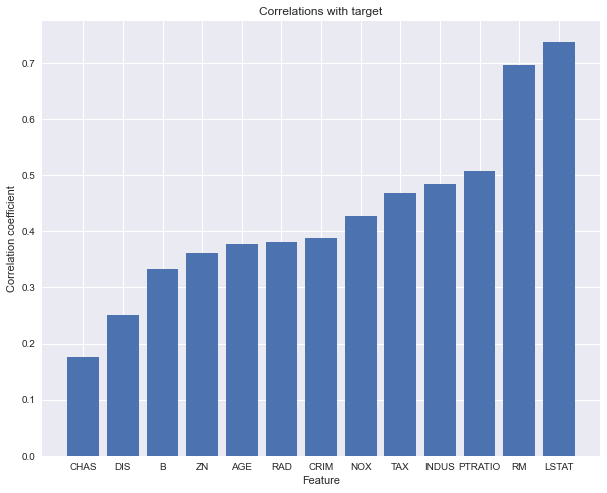

In [103]:
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
corr_with_target = corr_with_target.drop('MEDV')
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(corr_with_target.index, corr_with_target.values)
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y


Метод наименьших квадратов

In [104]:
X = boston_data[['LSTAT']]
y = boston_data['MEDV']
X

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [105]:
def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w
#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [106]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) 
    ax.legend(facecolor='white', fontsize=11) #легенда

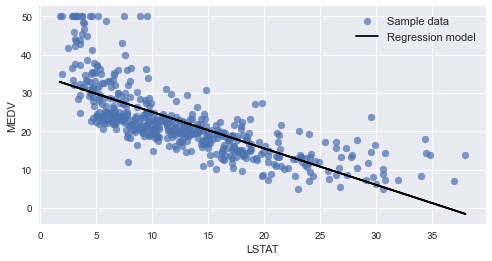

In [107]:
y_predict = w[0] + w[1] *X 
plot_regression_2d(X, y, y_predict)

In [108]:
#Создаём объект класса LinearRegression
from sklearn.linear_model import LinearRegression
lr_lstat = LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm
 

w0: 34.5538408793831
w1: [-0.95004935]


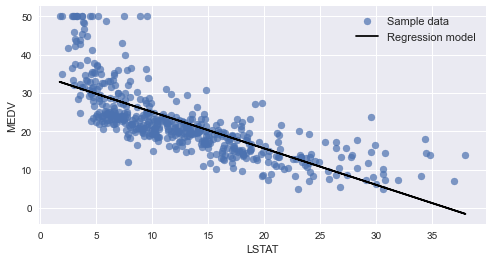

In [109]:
y_predict = lr_lstat.predict(X)
plot_regression_2d(X, y, y_predict)

In [110]:
features = boston_data.drop('MEDV', axis=1).columns
X = boston_data[features]
y = boston_data['MEDV']
lr_full = LinearRegression()
lr_full.fit(X,y)

LinearRegression()

In [111]:
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full.coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df
        )

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [112]:
y_predict

array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782,
       29.60408375, 22.74472741, 16.36039575,  6.11886372, 18.30799693,
       15.1253316 , 21.94668596, 19.62856553, 26.70643322, 24.80633451,
       26.50692285, 28.30251613, 20.61661686, 23.44776393, 23.83728417,
       14.58380346, 21.41465832, 16.76891698, 15.66685973, 19.06803641,
       18.86852605, 20.48360995, 18.13698805, 22.39320915, 23.17224962,
       13.08272548, 22.16519731,  8.22797329, 17.12043524, 15.22983702,
       25.35736314, 23.71377775, 26.22190805, 24.92984093, 30.44962767,
       32.67274316, 29.95560201, 29.03405413, 27.48547369, 25.48086955,
       24.85383698, 21.11064252, 16.69291303,  5.28282029, 19.16304135,
       21.77567707, 25.59487547, 29.53758029, 26.54492483, 20.49311044,
       29.98410349, 29.07205611, 30.80114593, 28.03650231, 25.79438584,
       22.06069188, 20.83512821, 28.16000873, 25.52837202, 26.90594358,
       30.1171104 , 24.8253355 , 26.85844111, 22.11769484, 26.20

c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


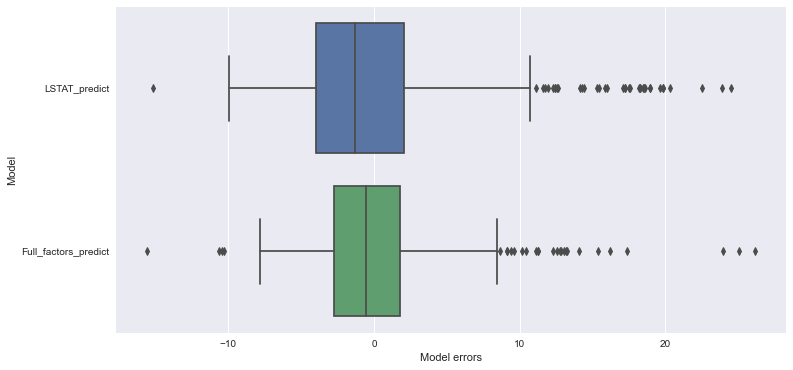

In [113]:
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [114]:
df_new_reg = pd.DataFrame({
'CRIM':         [0.35114],
'ZN':           [0.00000],
'INDUS':        [7.38000],
'CHAS':         [0.00000],
'NOX':          [0.49300],
'RM':           [6.04100],
'AGE':         [49.90000],
'DIS':          [4.72110],
'RAD':          [5.00000],
'TAX':        [287.00000],
'PTRATIO':     [19.60000],
'B':          [396.90000],
'LSTAT':        [7.70000],
})
df_new_reg
new_reg_pred = lr_full.predict(df_new_reg)
new_reg_pred

array([22.86952447])

In [115]:
data = pd.read_csv('../data/50_Startups.csv')
train = data.drop(['Profit', 'State'], axis=1)
y = data['Profit']
coefs = linear_regression(train, y)
coefs

array([ 5.01221930e+04,  8.05715050e-01, -2.68159684e-02,  2.72280648e-02])

Metric check


In [116]:
from sklearn import metrics

In [121]:
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
y = boston_data['MEDV']
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
print('RMSE score: {:.3f} thou. $'.format((metrics.mean_squared_error(y, y_predict_lstat))**0.5))
print('MAPE score: {:.3f} %'.format((metrics.mean_absolute_percentage_error(y, y_predict_lstat))*100))
print('R2 score: {:.3f} '.format((metrics.r2_score(y, y_predict_lstat))))

MAE score: 4.505 thou. $
RMSE score: 6.203 thou. $
MAPE score: 21.352 %
R2 score: 0.544 


In [122]:
y_predict_full = lr_full.predict(boston_data[features])
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_full)))
print('RMSE score: {:.3f} thou. $'.format((metrics.mean_squared_error(y, y_predict_full))**0.5))
print('MAPE score: {:.3f} %'.format((metrics.mean_absolute_percentage_error(y, y_predict_full))*100))
print('R2 score: {:.3f} '.format((metrics.r2_score(y, y_predict_full))))

MAE score: 3.271 thou. $
RMSE score: 4.679 thou. $
MAPE score: 16.417 %
R2 score: 0.741 


Сравним полученные результаты:

`MAE`: в среднем первая модель ошибается на  4.505 тыс. долларов, а вторая — на 3.271 тыс. долларов. <br>
`RMSE`: среднеквадратичное отклонение первой модели от истинных ответов составляет 6.203 тыс. долларов, а второй — 4.679. <br>
`MAPE`: первая модель ошибается на 21.352 %, а вторая — на 16.417 %. <br>
`R2`: доля объясняемой информации (дисперсии), которую улавливает первая модель, — 0.544, а вторая — 0.741.
Очевидно, что по всем метрикам вторая модель, построенная на основе всех признаков в данных, превосходит первую.

rmse


In [123]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]
summ=0
for i in range(len(y_true)):
    summ+= (y_true[i] - y_pred[i])**2
print((summ/len(y_true))**0.5)

5.746042116100439


$R^2$

In [141]:
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]
summ=0
y_true_mean  = sum(y_true)/len(y_true)
for i in range(len(y_true)):
    summ+= (y_true[i] - y_pred[i])**2
mse = summ/len(y_true)
summ=0
for i in range(len(y_true)):
    summ+= (y_true[i] -y_true_mean)**2
mse_mean = summ/len(y_true)
R_2 = 1 - mse/mse_mean
R_2

0.707747874730212